In [5]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [6]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/Houston-dataset.csv")



In [7]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 2127 non-null   object 
 1   created_at                  2127 non-null   object 
 2   hashtags                    1259 non-null   object 
 3   media                       39 non-null     object 
 4   urls                        2078 non-null   object 
 5   favorite_count              2127 non-null   int64  
 6   id                          2127 non-null   int64  
 7   in_reply_to_screen_name     24 non-null     object 
 8   in_reply_to_status_id       4 non-null      float64
 9   in_reply_to_user_id         24 non-null     float64
 10  lang                        2127 non-null   object 
 11  place                       2127 non-null   object 
 12  possibly_sensitive          2099 non-null   object 
 13  retweet_count               2127 

In [8]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-95.3694,29.7602",Mon Mar 23 03:21:19 +0000 2020,coronavirüs corona coronavirüsü virus China ma...,NaN,https://www.instagram.com/p/B-D5LbLhMiT/?igshi...,0,1241927980659720193,NaN,NaN,NaN,...,743,5,41,Houston,JJW ART PHOTOGRAPHY,JJW_Art_Photos,3945,NaN,http://www.youtube.com/jjwart,False
1,"-95.37923908,29.72228716",Sat Mar 28 12:27:36 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-Rvzuxp07N/?igshi...,0,1243877396081782785,NaN,NaN,NaN,...,1827,1295,59,"Houston, TX",Melodrama Boutique,MelodramaBTQ,15610,NaN,http://www.melodramaboutiqueonline.com,False
2,"-95.3694,29.7602",Sun Mar 22 23:10:02 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-DckCplPdN/?igshi...,2,1241864745298399235,NaN,NaN,NaN,...,1099,1810,45,"Katy, TX",TheSpiritedThrifter,SpiritedThriftr,12822,NaN,http://thespiritedthrifter.com,False
3,"-95.3694,29.7602",Thu Mar 26 19:34:44 +0000 2020,Repost Corona OkayBettAttire CoronaFree StaySa...,NaN,https://www.instagram.com/p/B-NXGZdp_Wt/?igshi...,1,1243260112346714113,NaN,NaN,NaN,...,53002,41111,64,Houston✈ International✈️,G〽️ayneDaWreck©,GMayniac_,44500,NaN,https://youtube.com/user/GMAYNE3,False
4,"-95.4902573,29.6991692",Mon Mar 23 18:00:49 +0000 2020,safe zone protectivestyles no corona,NaN,https://www.instagram.com/p/B-Fd-GNABxS/?igshi...,0,1242149315667210240,NaN,NaN,NaN,...,2255,1437,48,"Houston,Texas",Brandon/Beezy/Bigbee,BIGBEE713,19711,NaN,NaN,False


In [9]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [10]:
df_text.head(10)    

,text,created_at,place,hashtags
0,STAY HOME😷CORONAVIRUS🦠#coronavirüs #corona #co...,Mon Mar 23 03:21:19 +0000 2020,"Houston, TX",coronavirüs corona coronavirüsü virus China ma...
1,Onion Trunk Show CANCELLED due to the covid 19...,Sat Mar 28 12:27:36 +0000 2020,"Houston, TX",<NA>
2,"She is Boudicca, Unheard Warrior Queen of Brit...",Sun Mar 22 23:10:02 +0000 2020,"Houston, TX",<NA>
3,😤🔥🔥 #Repost @okaybettattire with @get_repost ・...,Thu Mar 26 19:34:44 +0000 2020,"Houston, TX",Repost Corona OkayBettAttire CoronaFree StaySa...
4,Gotcha covered momma 😷😍 shopnextlevelclothin...,Mon Mar 23 18:00:49 +0000 2020,"Houston, TX",safe zone protectivestyles no corona
5,Today was the first day since I’ve been in the...,Tue Mar 24 23:58:04 +0000 2020,"Katy, TX",<NA>
6,"Dear Corona Virus, Thank you for the lesson o...",Tue Mar 24 18:46:13 +0000 2020,"Sugar Land, TX",AlwaysASilverLiningChic WhatTrulyMatters
7,"Was a busy weekend for us at Authenticspice, H...",Tue Mar 24 16:42:02 +0000 2020,"Richmond, TX",meatpies
8,🤮🤯This Corona Virus ain't gonna take us Alive😥...,Sun Mar 22 22:23:27 +0000 2020,"Houston, TX",<NA>
9,Positively Prod. By @BradBeatMAKER Official Mu...,Mon Mar 23 23:02:19 +0000 2020,"Houston, TX",corona


## Cleaning the text Data

In [11]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [12]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [13]:
df_text.head(2)

,text,created_at,place,hashtags
0,STAY HOMECORONAVIRUScoronavirs corona coronavi...,Mon Mar 23 03:21:19 +0000 2020,"Houston, TX",coronavirüs corona coronavirüsü virus China ma...
1,Onion Trunk Show CANCELLED due to the corona ...,Sat Mar 28 12:27:36 +0000 2020,"Houston, TX",<NA>


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [14]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity
0,STAY HOMECORONAVIRUScoronavirs corona coronavi...,Mon Mar 23 03:21:19 +0000 2020,"Houston, TX",coronavirüs corona coronavirüsü virus China ma...,0.000000,0.000000
1,Onion Trunk Show CANCELLED due to the corona ...,Sat Mar 28 12:27:36 +0000 2020,"Houston, TX",<NA>,0.263333,0.056667
2,She is Boudicca Unheard Warrior Queen of Brito...,Sun Mar 22 23:10:02 +0000 2020,"Houston, TX",<NA>,0.000000,0.000000
3,Repost kaybettattire with etrepostNA Keep The...,Thu Mar 26 19:34:44 +0000 2020,"Houston, TX",Repost Corona OkayBettAttire CoronaFree StaySa...,0.427273,0.268182
4,Gotcha covered momma shopnextlevelclothing s...,Mon Mar 23 18:00:49 +0000 2020,"Houston, TX",safe zone protectivestyles no corona,0.250000,0.250000
5,Today was the first day since Ive been in the ...,Tue Mar 24 23:58:04 +0000 2020,"Katy, TX",<NA>,0.513889,0.154167
6,Dear Corona VirusThank you for the lesson of s...,Tue Mar 24 18:46:13 +0000 2020,"Sugar Land, TX",AlwaysASilverLiningChic WhatTrulyMatters,0.529630,0.181481
7,Was a busy weekend for us at Authenticspice He...,Tue Mar 24 16:42:02 +0000 2020,"Richmond, TX",meatpies,0.253571,-0.094643
8,This Corona Virus aint gonna take us AlivePlay...,Sun Mar 22 22:23:27 +0000 2020,"Houston, TX",<NA>,0.147619,0.066667
9,Positively Prod By radBeatMAKER Official Music...,Mon Mar 23 23:02:19 +0000 2020,"Houston, TX",corona,0.500000,0.287879


In [15]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_houston.csv")

## Make a WordCloud chart -word frequency map

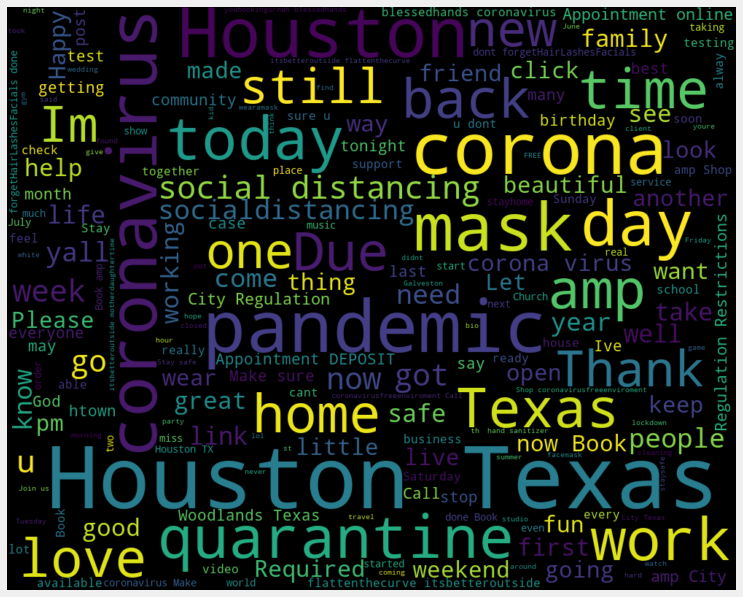

In [16]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=1000, height=800, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [17]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [18]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         # print()  #to print uncomment
#         j = j+1

## All Positive Tweets

In [19]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

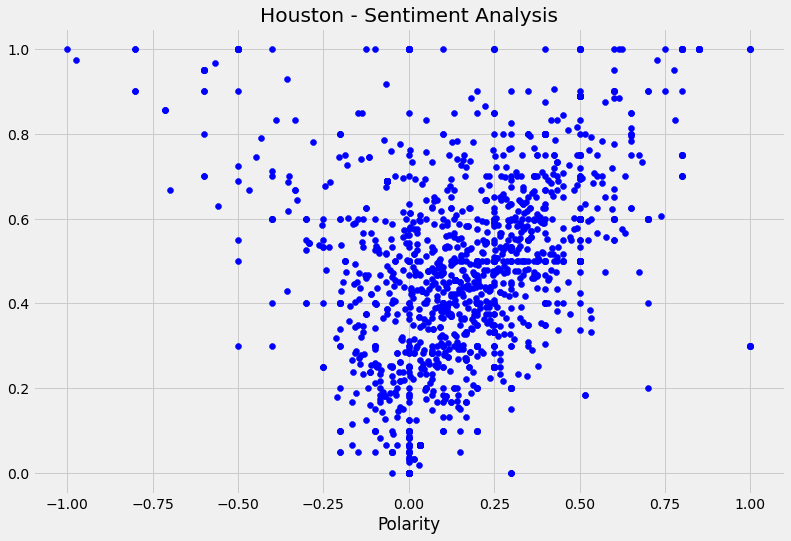

In [20]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Houston - Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [17]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 55.2 %


In [18]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 16.7 %


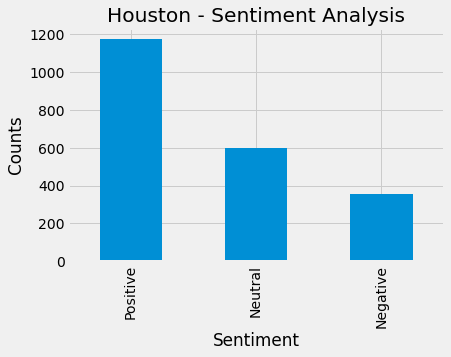

In [21]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Houston - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [22]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [23]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [24]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,STAY HOMECORONAVIRUScoronavirs corona coronavi...,Mon Mar 23 03:21:19 +0000 2020,"Houston, TX",coronavirüs corona coronavirüsü virus China ma...,0.0,0.0,Neutral,"[STAY, HOMECORONAVIRUScoronavirs, corona, coro..."


In [25]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,stay homecoronaviruscoronavirs corona coronavi...,mon mar 23 03:21:19 +0000 2020,"houston, tx",coronavirüs corona coronavirüsü virus china ma...,0.0,0.0,neutral,"['stay', 'homecoronaviruscoronavirs', 'corona'..."


## B.2 Apply Filters - Find/Remove Stopwords

In [26]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [27]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [28]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [29]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,stay homecoronaviruscoronavirs corona coronavi...,mon mar 23 03:21:19 +0000 2020,"houston, tx",coronavirüs corona coronavirüsü virus china ma...,0.0,0.0,neutral,"[stay, homecoronaviruscoronavirs, corona, coro..."
1,onion trunk show cancelled due to the corona ...,sat mar 28 12:27:36 +0000 2020,"houston, tx",<na>,0.2633333333333333,0.056666666666666664,positive,"[onion, trunk, show, cancelled, due, , , coron..."


## B.2 Apply Filters - stemming words

In [30]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [31]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [32]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,stay homecoronaviruscoronavirs corona coronavi...,mon mar 23 03:21:19 +0000 2020,"houston, tx",coronavirüs corona coronavirüsü virus china ma...,0.0,0.0,neutral,"[stay, homecoronaviruscoronavir, corona, coron..."
1,onion trunk show cancelled due to the corona ...,sat mar 28 12:27:36 +0000 2020,"houston, tx",<na>,0.2633333333333333,0.056666666666666664,positive,"[onion, trunk, show, cancel, due, , , corona, ..."


## Return the cleaned data into a sentence format

In [33]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,stay homecoronaviruscoronavirs corona coronavi...,mon mar 23 03:21:19 +0000 2020,"houston, tx",coronavirüs corona coronavirüsü virus china ma...,0.0,0.0,neutral,stay homecoronaviruscoronavir corona coronavir...
1,onion trunk show cancelled due to the corona ...,sat mar 28 12:27:36 +0000 2020,"houston, tx",<na>,0.2633333333333333,0.056666666666666664,positive,onion trunk show cancel due corona viru outb...
2,she is boudicca unheard warrior queen of brito...,sun mar 22 23:10:02 +0000 2020,"houston, tx",<na>,0.0,0.0,neutral,boudicca unheard warrior queen briton embo...
3,repost kaybettattire with etrepostna keep the...,thu mar 26 19:34:44 +0000 2020,"houston, tx",repost corona okaybettattire coronafree staysa...,0.42727272727272725,0.2681818181818182,positive,repost kaybettattir etrepostna keep corona ...
4,gotcha covered momma shopnextlevelclothing s...,mon mar 23 18:00:49 +0000 2020,"houston, tx",safe zone protectivestyles no corona,0.25,0.25,positive,gotcha cover momma shopnextlevelcloth safe zon...
5,today was the first day since ive been in the ...,tue mar 24 23:58:04 +0000 2020,"katy, tx",<na>,0.5138888888888888,0.15416666666666667,positive,today first day sinc ive mortgag loan bus...
6,dear corona virusthank you for the lesson of s...,tue mar 24 18:46:13 +0000 2020,"sugar land, tx",alwaysasilverliningchic whattrulymatters,0.5296296296296297,0.1814814814814815,positive,dear corona virusthank lesson slow still...
7,was a busy weekend for us at authenticspice he...,tue mar 24 16:42:02 +0000 2020,"richmond, tx",meatpies,0.25357142857142856,-0.09464285714285714,negative,busi weekend us authenticspic he faith go...
8,this corona virus aint gonna take us aliveplay...,sun mar 22 22:23:27 +0000 2020,"houston, tx",<na>,0.14761904761904762,0.06666666666666667,positive,corona viru aint gon na take us aliveplay r...
9,positively prod by radbeatmaker official music...,mon mar 23 23:02:19 +0000 2020,"houston, tx",corona,0.5,0.2878787878787879,positive,posit prod radbeatmak offici music video shot...


## Create a WordCloud from cleaned tweets


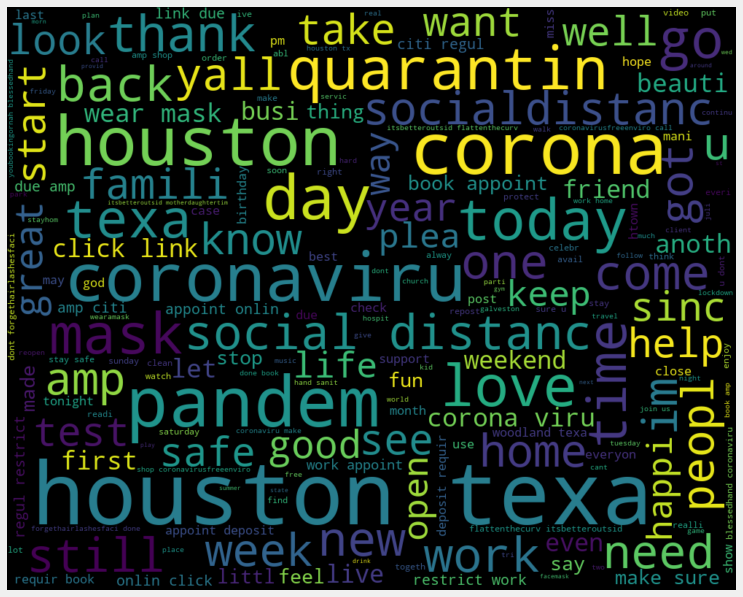

In [34]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])

wordCloud = WordCloud(width=1000, height=800, random_state=21,max_font_size=119).generate(allWords)

# size the plt object
plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [35]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000196B7D82310>>

In [36]:
from datetime import datetime
from dateutil.parser import parse


In [37]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [38]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,stay homecoronaviruscoronavirs corona coronavi...,mon mar 23 03:21:19 +0000 2020,"houston, tx",coronavirüs corona coronavirüsü virus china ma...,0.0,0.0,neutral,stay homecoronaviruscoronavir corona coronavir...,2020-03-23 03:21:19,3
1,onion trunk show cancelled due to the corona ...,sat mar 28 12:27:36 +0000 2020,"houston, tx",<na>,0.2633333333333333,0.056666666666666664,positive,onion trunk show cancel due corona viru outb...,2020-03-28 12:27:36,3
2,she is boudicca unheard warrior queen of brito...,sun mar 22 23:10:02 +0000 2020,"houston, tx",<na>,0.0,0.0,neutral,boudicca unheard warrior queen briton embo...,2020-03-22 23:10:02,3


## Data preparation for further visualizations

In [39]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [40]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,aldine,0.000000
1,alvin,0.300000
2,angleton,0.000000
3,atascocita,0.195539
4,baytown,0.051562


<AxesSubplot:title={'center':'Houston - Sentiments based on Regions'}, ylabel='place'>

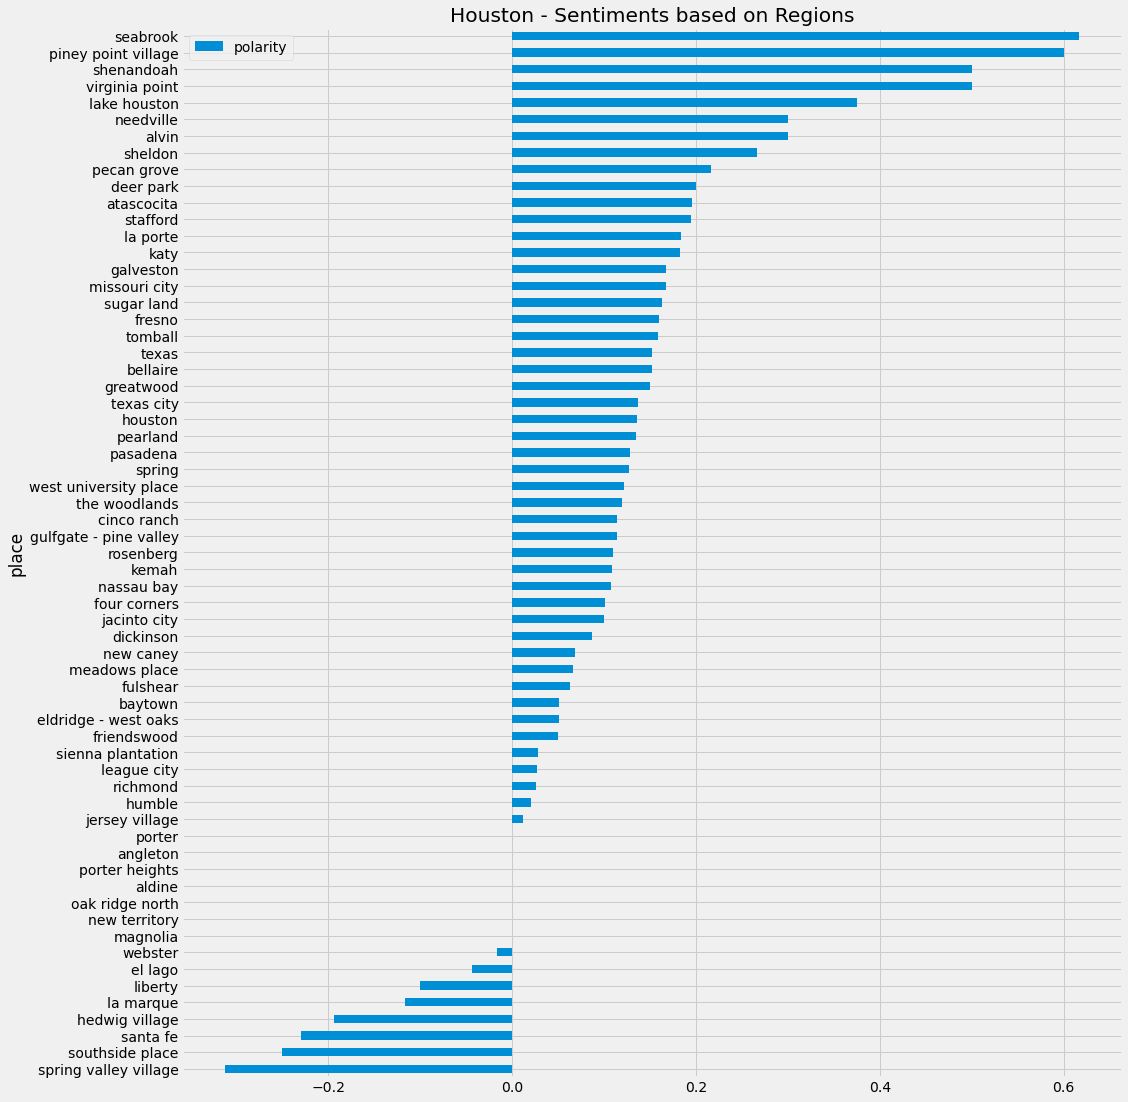

In [60]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 18), title='Houston - Sentiments based on Regions')





In [45]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.103128
1,4,0.098530
2,5,0.143181
3,6,0.102584
4,7,0.137336


<AxesSubplot:xlabel='month'>

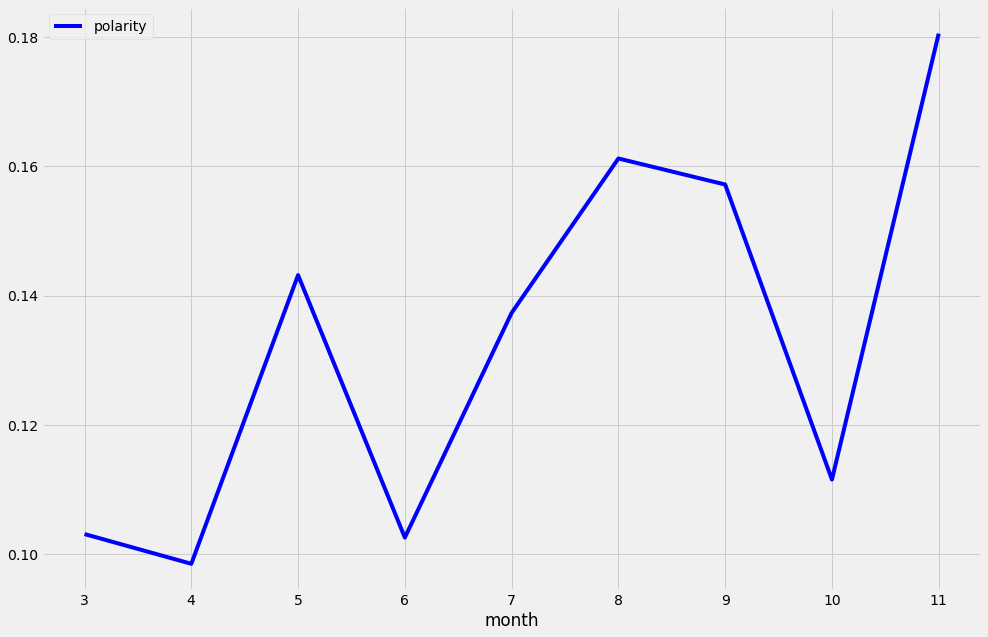

In [46]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue",title='Houston - Monthly progression - Sentiment Polarity')


## Extract Hashtags

In [47]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,stay homecoronaviruscoronavirs corona coronavi...,mon mar 23 03:21:19 +0000 2020,houston,coronavirüs corona coronavirüsü virus china ma...,0.000000,0.000000,neutral,stay homecoronaviruscoronavir corona coronavir...,2020-03-23 03:21:19,3
1,onion trunk show cancelled due to the corona ...,sat mar 28 12:27:36 +0000 2020,houston,<na>,0.263333,0.056667,positive,onion trunk show cancel due corona viru outb...,2020-03-28 12:27:36,3
2,she is boudicca unheard warrior queen of brito...,sun mar 22 23:10:02 +0000 2020,houston,<na>,0.000000,0.000000,neutral,boudicca unheard warrior queen briton embo...,2020-03-22 23:10:02,3
3,repost kaybettattire with etrepostna keep the...,thu mar 26 19:34:44 +0000 2020,houston,repost corona okaybettattire coronafree staysa...,0.427273,0.268182,positive,repost kaybettattir etrepostna keep corona ...,2020-03-26 19:34:44,3
4,gotcha covered momma shopnextlevelclothing s...,mon mar 23 18:00:49 +0000 2020,houston,safe zone protectivestyles no corona,0.250000,0.250000,positive,gotcha cover momma shopnextlevelcloth safe zon...,2020-03-23 18:00:49,3
5,today was the first day since ive been in the ...,tue mar 24 23:58:04 +0000 2020,katy,<na>,0.513889,0.154167,positive,today first day sinc ive mortgag loan bus...,2020-03-24 23:58:04,3
6,dear corona virusthank you for the lesson of s...,tue mar 24 18:46:13 +0000 2020,sugar land,alwaysasilverliningchic whattrulymatters,0.529630,0.181481,positive,dear corona virusthank lesson slow still...,2020-03-24 18:46:13,3
7,was a busy weekend for us at authenticspice he...,tue mar 24 16:42:02 +0000 2020,richmond,meatpies,0.253571,-0.094643,negative,busi weekend us authenticspic he faith go...,2020-03-24 16:42:02,3
8,this corona virus aint gonna take us aliveplay...,sun mar 22 22:23:27 +0000 2020,houston,<na>,0.147619,0.066667,positive,corona viru aint gon na take us aliveplay r...,2020-03-22 22:23:27,3
9,positively prod by radbeatmaker official music...,mon mar 23 23:02:19 +0000 2020,houston,corona,0.500000,0.287879,positive,posit prod radbeatmak offici music video shot...,2020-03-23 23:02:19,3


In [48]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [49]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [50]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
22,covid19,35
5,coronavirus,24
7,corona,19
36,houston,17
114,covid,14
6,socialdistancing,12
28,quarantine,10
127,pandemic,10
3,covid_19,9
37,texas,9


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

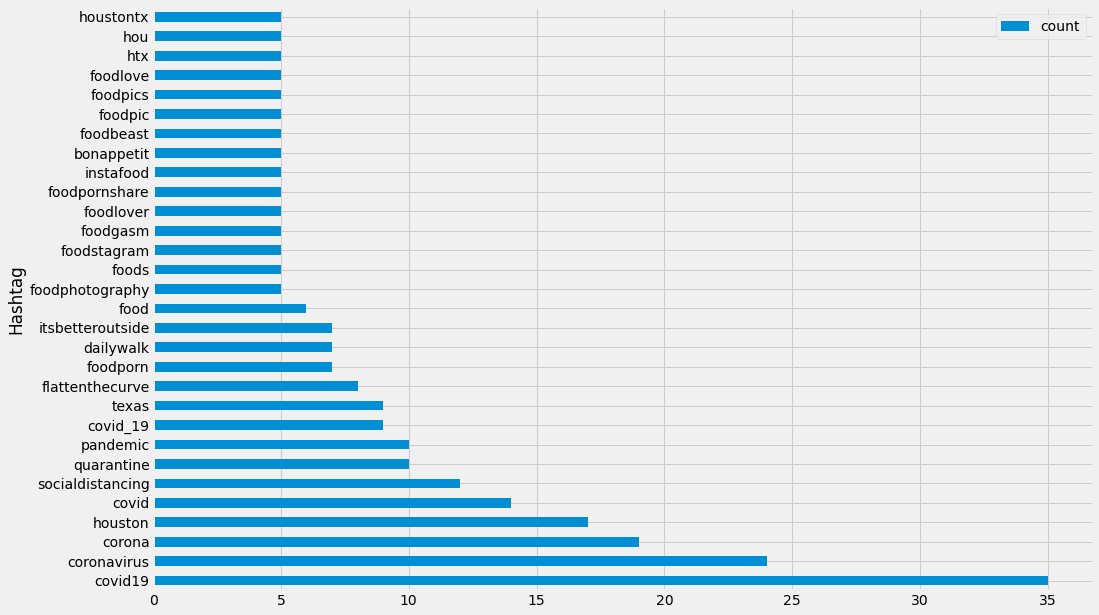

In [51]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))


In [52]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
128,covid19,183
52,coronavirus,101
67,houston,86
1,corona,50
147,socialdistancing,49
148,covid,46
891,flattenthecurve,38
889,dailywalk,36
892,itsbetteroutside,36
137,quarantine,31


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

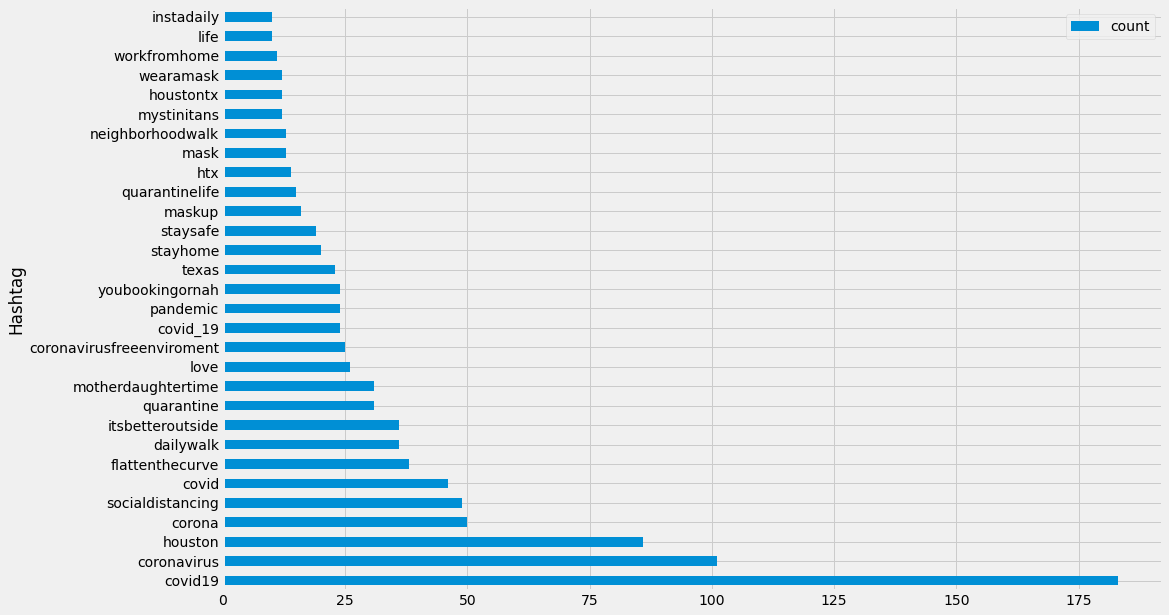

In [53]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))

In [54]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [55]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [56]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,stay homecoronaviruscoronavirs corona coronavi...,mon mar 23 03:21:19 +0000 2020,houston,coronavirüs corona coronavirüsü virus china ma...,0.000000,0.000000,neutral,stay homecoronaviruscoronavir corona coronavir...,2020-03-23 03:21:19,3,0
1,onion trunk show cancelled due to the corona ...,sat mar 28 12:27:36 +0000 2020,houston,<na>,0.263333,0.056667,positive,onion trunk show cancel due corona viru outb...,2020-03-28 12:27:36,3,0
2,she is boudicca unheard warrior queen of brito...,sun mar 22 23:10:02 +0000 2020,houston,<na>,0.000000,0.000000,neutral,boudicca unheard warrior queen briton embo...,2020-03-22 23:10:02,3,0
3,repost kaybettattire with etrepostna keep the...,thu mar 26 19:34:44 +0000 2020,houston,repost corona okaybettattire coronafree staysa...,0.427273,0.268182,positive,repost kaybettattir etrepostna keep corona ...,2020-03-26 19:34:44,3,0
4,gotcha covered momma shopnextlevelclothing s...,mon mar 23 18:00:49 +0000 2020,houston,safe zone protectivestyles no corona,0.250000,0.250000,positive,gotcha cover momma shopnextlevelcloth safe zon...,2020-03-23 18:00:49,3,0
